In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("insurance_claims_regression (1).csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (260, 10)


,fraud_flag,days_until_settlement,claim_amount_k,claim_amount_k.1,num_previous_claims,claim_amount_k.2,claim_amount_k.3,policy_type,policy_holder_age,claim_id
0,0.0,76.0,NaN,NaN,2.0,NaN,NaN,Auto,69.0,C110000
1,NaN,118.0,103.70,103.70,0.0,103.70,103.70,ealth,76.0,C110001
2,0.0,24.0,147.67,147.67,0.0,147.67,147.67,Home,21.0,C110002
3,0.0,80.0,175.88,175.88,2.0,175.88,175.88,Auto,57.0,C110003
4,0.0,8.0,158.71,158.71,1.0,158.71,158.71,NaN,24.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_flag             227 non-null    float64
 1   days_until_settlement  237 non-null    float64
 2   claim_amount_k         237 non-null    float64
 3   claim_amount_k.1       237 non-null    float64
 4   num_previous_claims    237 non-null    float64
 5   claim_amount_k.2       237 non-null    float64
 6   claim_amount_k.3       237 non-null    float64
 7   policy_type            232 non-null    object 
 8   policy_holder_age      236 non-null    float64
 9   claim_id               236 non-null    object 
dtypes: float64(8), object(2)
memory usage: 20.4+ KB


In [ ]:
df.columns

Index(['fraud_flag', 'days_until_settlement', 'claim_amount_k',
       'claim_amount_k.1', 'num_previous_claims', 'claim_amount_k.2',
       'claim_amount_k.3', 'policy_type', 'policy_holder_age', 'claim_id'],
      dtype='object')

In [ ]:
df.describe()

,fraud_flag,days_until_settlement,claim_amount_k,claim_amount_k.1,num_previous_claims,claim_amount_k.2,claim_amount_k.3,policy_holder_age
count,227.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,236.000000
mean,0.026432,88.008439,95.701814,95.701814,1.881857,95.701814,95.701814,53.927966
std,0.160770,51.470659,56.041557,56.041557,1.427176,56.041557,56.041557,20.890166
min,0.000000,1.000000,2.030000,2.030000,0.000000,2.030000,2.030000,18.000000
25%,0.000000,38.000000,41.900000,41.900000,1.000000,41.900000,41.900000,36.750000
50%,0.000000,90.000000,93.460000,93.460000,2.000000,93.460000,93.460000,51.500000
75%,0.000000,130.000000,145.190000,145.190000,3.000000,145.190000,145.190000,73.250000
max,1.000000,178.000000,199.060000,199.060000,4.000000,199.060000,199.060000,89.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
255,True
256,True
257,True
258,True


In [ ]:
df.drop_duplicates(ignore_index  = True, inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,fraud_flag,days_until_settlement,claim_amount_k,claim_amount_k.1,num_previous_claims,claim_amount_k.2,claim_amount_k.3,policy_type,policy_holder_age,claim_id
0,0.0,76.0,NaN,NaN,2.0,NaN,NaN,Auto,69.0,C110000
1,NaN,118.0,103.70,103.70,0.0,103.70,103.70,ealth,76.0,C110001
2,0.0,24.0,147.67,147.67,0.0,147.67,147.67,Home,21.0,C110002
3,0.0,80.0,175.88,175.88,2.0,175.88,175.88,Auto,57.0,C110003
4,0.0,8.0,158.71,158.71,1.0,158.71,158.71,NaN,24.0,NaN


In [ ]:
df["fraud_flag"].unique()

array([ 0., nan,  1.])

In [ ]:
df["fraud_flag"].isnull().sum()

np.int64(29)

In [ ]:
df['fraud_flag'].fillna(df['fraud_flag'].mode()[0], inplace=True)

/tmp/ipython-input-692443133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fraud_flag'].fillna(df['fraud_flag'].mode()[0], inplace=True)


In [ ]:
df["fraud_flag"].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
fraud_flag,0
days_until_settlement,22
claim_amount_k,22
claim_amount_k.1,22
num_previous_claims,22
claim_amount_k.2,22
claim_amount_k.3,22
policy_type,25
policy_holder_age,24
claim_id,24


In [ ]:
df.head()

,fraud_flag,days_until_settlement,claim_amount_k,claim_amount_k.1,num_previous_claims,claim_amount_k.2,claim_amount_k.3,policy_type,policy_holder_age,claim_id
0,0.0,76.0,96.609474,96.609474,2.0,96.609474,96.609474,Auto,69.0,C110000
1,0.0,118.0,103.700000,103.700000,0.0,103.700000,103.700000,ealth,76.0,C110001
2,0.0,24.0,147.670000,147.670000,0.0,147.670000,147.670000,Home,21.0,C110002
3,0.0,80.0,175.880000,175.880000,2.0,175.880000,175.880000,Auto,57.0,C110003
4,0.0,8.0,158.710000,158.710000,1.0,158.710000,158.710000,Auto,24.0,C110000


In [ ]:

df["days_until_settlement"].fillna(method = "bfill", inplace = True)
df["claim_amount_k"].fillna(method = "bfill", inplace = True)
df["claim_amount_k.1"].interpolate(inplace = True)
df["num_previous_claims"].fillna(method = "bfill", inplace = True)
df["claim_amount_k.2"].fillna(method = "bfill", inplace = True)
df["claim_amount_k.3"].fillna(method = "bfill", inplace = True)
df["policy_type"].fillna(method = "bfill", inplace = True)
df["policy_holder_age"].fillna(method = "bfill", inplace = True)
df["claim_id"].fillna(method = "bfill", inplace = True)
df.isnull().sum()

/tmp/ipython-input-1178258235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_until_settlement"].fillna(method = "bfill", inplace = True)
/tmp/ipython-input-1178258235.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["days_until_settlement"].fillna(method = "bfill", inplace = True)
/tmp/ipython-input-1178258235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment 

,0
fraud_flag,0
days_until_settlement,0
claim_amount_k,0
claim_amount_k.1,0
num_previous_claims,0
claim_amount_k.2,0
claim_amount_k.3,0
policy_type,0
policy_holder_age,0
claim_id,0


In [ ]:
df.to_csv('/content/insurance_cleaned.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/insurance_cleaned.csv')
df

,fraud_flag,days_until_settlement,claim_amount_k,claim_amount_k.1,num_previous_claims,claim_amount_k.2,claim_amount_k.3,policy_type,policy_holder_age,claim_id
0,0.0,76.00000,96.609474,96.609474,2.000000,96.609474,96.609474,Auto,69.0,C110000
1,0.0,118.00000,103.700000,103.700000,0.000000,103.700000,103.700000,ealth,76.0,C110001
2,0.0,24.00000,147.670000,147.670000,0.000000,147.670000,147.670000,Home,21.0,C110002
3,0.0,80.00000,175.880000,175.880000,2.000000,175.880000,175.880000,Auto,57.0,C110003
4,0.0,8.00000,158.710000,158.710000,1.000000,158.710000,158.710000,Auto,24.0,C110000
...,...,...,...,...,...,...,...,...,...,...
245,0.0,178.00000,181.030000,181.030000,1.890351,181.030000,181.030000,Home,78.0,C110245
246,0.0,81.00000,60.250000,60.250000,2.000000,60.250000,60.250000,Auto,85.0,C110246
247,0.0,177.00000,11.820000,11.820000,0.000000,11.820000,11.820000,AUTO,47.0,C110247
248,0.0,27.00000,183.400000,183.400000,0.000000,183.400000,183.400000,Home,79.0,C110000


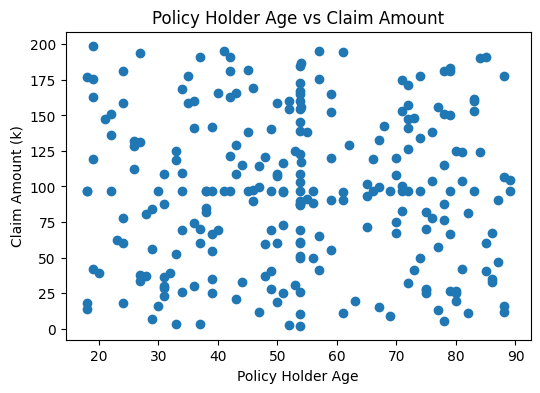

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['policy_holder_age'], df['claim_amount_k'])
plt.title('Policy Holder Age vs Claim Amount')
plt.xlabel('Policy Holder Age')
plt.ylabel('Claim Amount (k)')
plt.show()

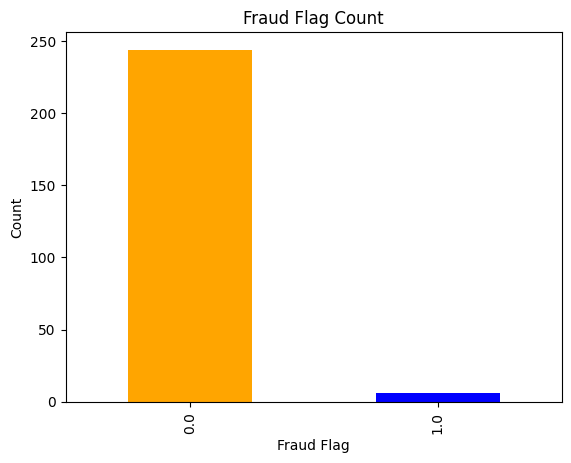

In [ ]:
df['fraud_flag'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Fraud Flag Count')
plt.xlabel('Fraud Flag')
plt.ylabel('Count')
plt.show()

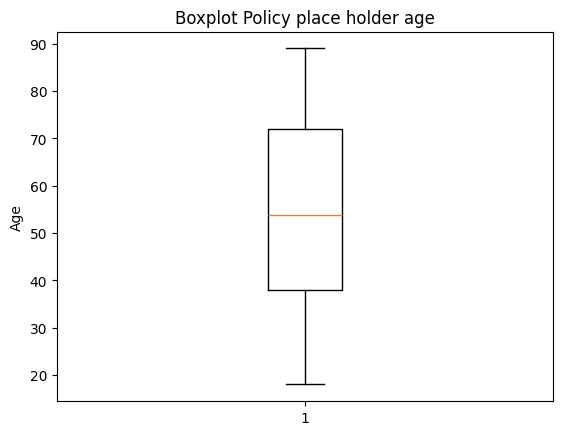

In [ ]:
plt.boxplot(df["policy_holder_age"])
plt.title("Boxplot Policy place holder age")
plt.ylabel("Age")
plt.show()